In [1]:
import os
import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
#local data dir
_data_dir = os.path.join('/Users/murraywebb/Projects/sightly', 'raw')

In [6]:
#join func
def load_data(filename):
    #dtype = {
    #    'cpv': np.int32,
    #}
    dates = ['StartDate','EndDate']
    if filename == 'allOrders.csv': 
        return pd.read_csv(os.path.join(_data_dir, filename), parse_dates=dates, sep=',', engine='c')
    else:
        return pd.read_csv(os.path.join(_data_dir, filename), sep=',', engine='c')



In [7]:
#read in data for iter 1
allOrders = load_data('allOrders.csv')
objectives = load_data('objectives.csv')
targetedAgeRanges = load_data('targetedAgeRanges.csv')
targetedDevices = load_data('targetedDevices.csv')
targetedGenders = load_data('targetedGenders.csv')
targetedGeos = load_data('targetedGeos.csv')
advertiserCategories = load_data('advertiserCategories.csv')

In [8]:
#join 6 datasets at indices
dfs = [allOrders, objectives, targetedDevices, targetedAgeRanges, targetedGeos, advertiserCategories]
dfs = [df.set_index(['AccountName','OrderId']) for df in dfs]
allData = dfs[0].join(dfs[1:])

In [9]:
allData.shape

(472532, 10)

In [10]:
len(advertiserCategories.AdvertiserSubCategory.unique())

48

In [11]:
allData.head()

StartDate    EndDate  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   

                                                  CampaignBudget  \
AccountName OrderId                                                
AMG         00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   

                                                  SightlySpend     CPV  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   

                                                    Objective  \
AccountName OrderId                                             
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   

                                                                             Device  \
AccountName OrderId                                                                   
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Mobile devices with full browsers   
            00FE3186-F3E0-48E2-999A-A893016D7517  Mobile devices with full browsers   
            00FE3186-F3E0-48E2-999A-A893016D7517  Mobile devices with full browsers   
            00FE3186-F3E0-48E2-999A-A893016D7517  Mobile devices with full browsers   
            00FE3186-F3E0-48E2-999A-A893016D7517  Mobile devices with full browsers   

                                                      AgeGroup  \
AccountName OrderId                                              
AMG         00FE3186-F3E0-48E2-999A-A893016D7517         35-44   
            00FE3186-F3E0-48E2-999A-A893016D7517         55-64   
            00FE3186-F3E0-48E2-999A-A893016D7517    65 or more   
            00FE3186-F3E0-48E2-999A-A893016D7517         25-34   
            00FE3186-F3E0-48E2-999A-A893016D7517  Undetermined   

                                                                       Geo  \
AccountName OrderId                                                          
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   

                                                         AdvertiserSubCategory  
AccountName OrderId                                                             
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Lawyers: Personal Injury Law  
            00FE3186-F3E0-48E2-999A-A893016D7517  Lawyers: Personal Injury Law  
            00FE3186-F3E0-48E2-999A-A893016D7517  Lawyers: Personal Injury Law  
            00FE3186-F3E0-48E2-999A-A893016D7517  Lawy

In [12]:
#geo regex
regex_state = r'(^([^,]+),([^,]+))'
#geo = allData.Geo.str.replace('DMA','').str.extract(regex_state)
geo = allData.Geo.str.extract(regex_state)
geo.columns=['full_geo', 'first_position', 'state']
allData['__Geo__'] = geo.state

In [13]:
allData.__Geo__.value_counts()

 Pennsylvania                          191610
 Massachusetts                         105074
 Michigan                               33059
 Connecticut                            22784
 Ohio                                   16710
 New Jersey                             13730
 Washington                             12664
 Arkansas                               11750
 Texas                                  10404
 Oregon                                  8184
 Florida                                 7010
 Rhode Island                            5932
 Maryland                                4032
 New Hampshire                           3696
 New York                                3236
 West Virginia                           3188
 Alabama                                 3154
 Alabama DMA                             1390
 Vermont                                 1344
 Delaware                                1248
 Illinois                                1106
 New York DMA                     

In [14]:
allData[allData['Geo'].str.contains('DMA', na=False)].shape


(7464, 11)

In [15]:
len(allData.__Geo__.unique())

56

In [16]:
#dummy var for age
age_dummy = pd.get_dummies(allData.AgeGroup)
allData = pd.concat([allData, age_dummy], axis=1)
allData = allData.drop(['AgeGroup'], axis=1)

In [17]:
#dummy for Device
device_dummy = pd.get_dummies(allData.Device)
allData = pd.concat([allData, device_dummy], axis=1)
allData = allData.drop(['Device'], axis=1)

In [18]:
#dummy for cats
cat_dummy = pd.get_dummies(allData.AdvertiserSubCategory)
allData = pd.concat([allData, cat_dummy], axis=1)
allData = allData.drop(['AdvertiserSubCategory'], axis=1)

In [19]:
geo_dummy = pd.get_dummies(allData.__Geo__)
allData = pd.concat([allData, geo_dummy], axis=1)
allData = allData.drop(['__Geo__'], axis=1)

In [20]:
allData.shape

(472532, 119)

In [21]:
allData.head()

StartDate    EndDate  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   

                                                  CampaignBudget  \
AccountName OrderId                                                
AMG         00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   

                                                  SightlySpend     CPV  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   

                                                    Objective  \
AccountName OrderId                                             
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   

                                                                       Geo  \
AccountName OrderId                                                          
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   

                                                  18-24  25-34  35-44  \
AccountName OrderId                                                     
AMG         00FE3186-F3E0-48E2-999A-A893016D7517      0      0      1   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      1      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   

                                                     ...       Tennessee DMA  \
AccountName OrderId                                  ...                       
AMG         00FE3186-F3E0-48E2-999A-A893016D7517     ...                   1   
            00FE3186-F3E0-48E2-999A-A893016D7517     ...                   1   
            00FE3186-F3E0-48E2-999A-A893016D7517     ...                   1   
            00FE3186-F3E0-48E2-999A-A893016D7517     ...                   1   
            00FE3186-F3E0-48E2-999A-A893016D7517     ...                   1   

                                                   Tennessee-Virginia DMA  \
AccountName OrderId                                                         
AMG         00FE3186-F3E0-48E2-999A-A893016D7517                        0   
            00FE3186-F3E0-48E2-999A-A893016D7517                        0   
            00FE3186-F3E0-48E2-999A-A893016D7517                        0   
            00FE3186-F3E0-48E2-999A-A893016D7517                        0 

In [22]:
list(allData.columns)

['StartDate',
 'EndDate',
 'CampaignBudget',
 'SightlySpend',
 'CPV',
 'Objective',
 'Geo',
 '18-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65 or more',
 'Undetermined',
 'Computers',
 'Mobile devices with full browsers',
 'Other',
 'Tablets with full browsers',
 'Airports',
 'Banks & Credit Unions',
 'Beaches',
 'Beer Wine & Spirits',
 'Botanical Gardens',
 'Car Dealers',
 'Car Dealers - New',
 'Car Dealers - Used',
 'Career Counseling',
 'Carpet Installation',
 'Casinos',
 'Colleges & Universities',
 'Dentists: Orthodontists',
 'Educational Services',
 'Electronics',
 'Farmers Market',
 'Festivals',
 'Home & Garden',
 'Home & Garden: Appliances',
 'Home Staging',
 'Hospitals',
 'Jewelry',
 'Lawyers',
 'Lawyers: Personal Injury Law',
 'Lighting Fixtures & Equipment',
 'Medical Centers',
 'Middle Schools & High Schools',
 'Motorcycle Dealers',
 'Motorsport Vehicle Dealers',
 'Museums',
 'Museums: Art Museums',
 'Music Venues',
 'Opera & Ballet',
 'Parks',
 'Performing Arts',
 'Pres

In [23]:
allData.shape

(472532, 119)

In [24]:
#Date index function
allData['sdm'] = allData['StartDate'].apply(lambda x: x.month)
allData['edm'] = allData['EndDate'].apply(lambda x: x.month)

def drange(start, end):
    if start == end:
        return [start]
    elif start < end:
        return list(range(start, end + 1))
    else:
        return list(range(start, 13)) + list(range(1, end + 1))

def apply_(row, month):
    if (row.EndDate - row.StartDate).days >= 365:
        return 1
    elif month in drange(row.sdm, row.edm):
        return 1
    else:
        return 0
        
    
allData['jan'] = allData.apply(apply_, axis=1, args=[1])
allData['feb'] = allData.apply(apply_, axis=1, args=[2])
allData['march'] = allData.apply(apply_, axis=1, args=[3])
allData['april'] = allData.apply(apply_, axis=1, args=[4])
allData['may'] = allData.apply(apply_, axis=1, args=[5])
allData['june'] = allData.apply(apply_, axis=1, args=[6])
allData['july'] = allData.apply(apply_, axis=1, args=[7])
allData['august'] = allData.apply(apply_, axis=1, args=[8])
allData['september'] = allData.apply(apply_, axis=1, args=[9])
allData['october'] = allData.apply(apply_, axis=1, args=[10])
allData['november'] = allData.apply(apply_, axis=1, args=[11])
allData['december'] = allData.apply(apply_, axis=1, args=[12])
#allData.loc[(allData.jan == 1) & (allData.feb == 1)].head()

In [25]:
allData.head()

StartDate    EndDate  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   
            00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19   

                                                  CampaignBudget  \
AccountName OrderId                                                
AMG         00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   
            00FE3186-F3E0-48E2-999A-A893016D7517          6000.0   

                                                  SightlySpend     CPV  \
AccountName OrderId                                                      
AMG         00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   
            00FE3186-F3E0-48E2-999A-A893016D7517        2475.0  0.0024   

                                                    Objective  \
AccountName OrderId                                             
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   
            00FE3186-F3E0-48E2-999A-A893016D7517  Full Funnel   

                                                                       Geo  \
AccountName OrderId                                                          
AMG         00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   
            00FE3186-F3E0-48E2-999A-A893016D7517  Nashville, Tennessee DMA   

                                                  18-24  25-34  35-44  \
AccountName OrderId                                                     
AMG         00FE3186-F3E0-48E2-999A-A893016D7517      0      0      1   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      1      0   
            00FE3186-F3E0-48E2-999A-A893016D7517      0      0      0   

                                                    ...     march  april  may  \
AccountName OrderId                                 ...                         
AMG         00FE3186-F3E0-48E2-999A-A893016D7517    ...         1      1    1   
            00FE3186-F3E0-48E2-999A-A893016D7517    ...         1      1    1   
            00FE3186-F3E0-48E2-999A-A893016D7517    ...         1      1    1   
            00FE3186-F3E0-48E2-999A-A893016D7517    ...         1      1    1   
            00FE3186-F3E0-48E2-999A-A893016D7517    ...         1      1    1   

                                                  june  july  august  \
AccountName OrderId                                                    
AMG         00FE3186-F3E0-48E2-999A-A893016D7517     0     0       0   
            00FE3186-F3E0-48E2-999A-A893016D7517     0     0       0   
            00FE3186-F3E0-48E2-999A-A893016D7517     0     0       0   
            00FE3186-F3E0-48E2-999A-A893016D7517     0     0       0   
            00FE3186

In [ ]:
#geo regex duplicate from above to test
#regex_state = r'(^([^,]+),([^,]+))'
#geo = allData.Geo.str.replace('DMA','').str.extract(regex_state)
#geo = allData.Geo.str.extract(regex_state)
#geo.columns=['full_geo', 'first_position', 'state']
#allData['State'] = geo.state

In [27]:
allDataDuped = allData.reset_index().groupby(['AccountName', 'OrderId']).agg({
    'StartDate': 'first',
    'EndDate': 'first',
    'jan': 'first',
    'feb': 'first',
    'march': 'first',
    'april': 'first',
    'may': 'first',
    'june': 'first',
    'july': 'first',
    'august': 'first',
    'september': 'first',
    'october': 'first',
    'november': 'first',
    'december': 'first',
    '18-24': 'first',
    '25-34': 'first',
    '45-54': 'first',
    '55-64': 'first',
    '65 or more': 'first',
    'Undetermined': 'first',
    'Computers': 'first',
    'Mobile devices with full browsers': 'first',    
    'Other': 'first',    
    'Tablets with full browsers': 'first',
    'CampaignBudget': 'first', 
    'Airports': 'first',
    'Banks & Credit Unions': 'first',
    'Beaches':'first',
    'Beer Wine & Spirits': 'first',
    'Botanical Gardens': 'first',
    'Car Dealers': 'first',
    'Car Dealers - New': 'first',
    'Car Dealers - Used': 'first',
    'Career Counseling': 'first',
    'Carpet Installation': 'first',
    'Casinos': 'first',
    'Colleges & Universities': 'first',
    'Dentists: Orthodontists': 'first',
    'Educational Services': 'first',
    'Electronics': 'first',
    'Farmers Market': 'first',
    'Festivals': 'first',
    'Home & Garden': 'first',
    'Home & Garden: Appliances': 'first',
    'Home Staging': 'first',
    'Hospitals': 'first',
    'Jewelry': 'first',
    'Lawyers': 'first',
    'Lawyers: Personal Injury Law': 'first',
    'Lighting Fixtures & Equipment': 'first',
    'Medical Centers': 'first',
    'Middle Schools & High Schools': 'first',
    'Motorcycle Dealers': 'first',
    'Museums': 'first',
    'Museums: Art Museums': 'first',
    'Music Venues': 'first',
    'Opera & Ballet': 'first',
    'Parks': 'first',
    'Performing Arts': 'first',
    'Preschools': 'first',
    'Rafting/Kayaking': 'first',
    'Real Estate Agents': 'first',
    'Residential Developers': 'first',
    'Sporting Goods': 'first',
    'Sporting Goods: Ski & Snowboard Shops': 'first',
    'Ticket Sales': 'first',
    'Tours': 'first',
    'Travel Services: Visitor Centers': 'first',
    'Utilities': 'first',
    'Wineries': 'first',
    'SightlySpend': 'first', 
    ' AR DMA': 'first',
 ' Alabama': 'first',
 ' Alabama DMA': 'first',
 ' Alabama-Pensacola-Ft. Walton Beach': 'first',
 ' Arizona': 'first',
 ' Arkansas': 'first',
 ' California': 'first',
 ' California DMA': 'first',
 ' Connecticut': 'first',
 ' Connecticut DMA': 'first',
 ' Delaware': 'first',
 ' Florida': 'first',
 ' Florida DMA': 'first',
 ' Florida-Thomasville': 'first',
 ' Georgia': 'first',
 ' Georgia DMA': 'first',
 ' Illinois': 'first',
 ' Illinois DMA': 'first',
 ' Indiana': 'first',
 ' Indiana DMA': 'first',
 ' Kentucky': 'first',
 ' Kentucky DMA': 'first',
 ' Louisiana': 'first',
 ' Louisiana DMA': 'first',
 ' Maryland': 'first',
 ' Massachusetts': 'first',
 ' Massachusetts DMA': 'first',
 ' Michigan': 'first',
 ' Michigan DMA': 'first',
 ' Mississippi DMA': 'first',
 ' New Hampshire': 'first',
 ' New Jersey': 'first',
 ' New York': 'first',
 ' New York DMA': 'first',
 ' North Carolina': 'first',
 ' North Carolina DMA': 'first',
 ' Ohio': 'first',
 ' Ohio DMA': 'first',
 ' Oregon': 'first',
 ' Oregon DMA': 'first',
 ' Pennsylvania': 'first',
 ' Pennsylvania DMA': 'first',
 ' Rhode Island': 'first',
 ' South Carolina-Asheville': 'first',
 ' Tennessee': 'first',
 ' Tennessee DMA': 'first',
 ' Tennessee-Virginia DMA': 'first',
 ' Texas': 'first',
 ' Texas DMA': 'first',
 ' Vermont': 'first',
 ' Virginia': 'first',
 ' Washington': 'first',
 ' Washington DMA': 'first',
 ' West Virginia': 'first',
 ' Wisconsin': 'first',
    'CPV': 'first'
})


In [ ]:
#dummy state here
#state_dummy = pd.get_dummies(allDataDuped.State)
#allDataDuped = pd.concat([allDataDuped, state_dummy], axis=1)
#allDataDuped = allDataDuped.drop(['State'], axis=1)

In [28]:
allDataDuped.head()

StartDate    EndDate  jan  \
AccountName OrderId                                                           
AMG         00FE3186-F3E0-48E2-999A-A893016D7517 2018-02-26 2018-05-19    0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8 2017-06-28 2017-07-27    0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3 2017-06-09 2017-09-12    0   
            04977D2F-7F0D-480E-BD26-A7FA01692630 2017-09-26 2017-10-02    0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843 2018-02-07 2018-07-31    0   

                                                  feb  march  april  may  \
AccountName OrderId                                                        
AMG         00FE3186-F3E0-48E2-999A-A893016D7517    1      1      1    1   
            01961DAD-296D-4DE6-84E5-A7A0012244F8    0      0      0    0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3    0      0      0    0   
            04977D2F-7F0D-480E-BD26-A7FA01692630    0      0      0    0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843    1      1      1    1   

                                                  june  july  august   ...    \
AccountName OrderId                                                    ...     
AMG         00FE3186-F3E0-48E2-999A-A893016D7517     0     0       0   ...     
            01961DAD-296D-4DE6-84E5-A7A0012244F8     1     1       0   ...     
            045E48BE-7AB6-4C30-940D-A78B000C32D3     1     1       1   ...     
            04977D2F-7F0D-480E-BD26-A7FA01692630     0     0       0   ...     
            05F2D60F-E7F1-4F94-BA0F-A8800008A843     1     1       0   ...     

                                                   Tennessee-Virginia DMA  \
AccountName OrderId                                                         
AMG         00FE3186-F3E0-48E2-999A-A893016D7517                        0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8                        0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3                        0   
            04977D2F-7F0D-480E-BD26-A7FA01692630                        0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843                        0   

                                                   Texas   Texas DMA  \
AccountName OrderId                                                    
AMG         00FE3186-F3E0-48E2-999A-A893016D7517       0           0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8       0           0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3       0           0   
            04977D2F-7F0D-480E-BD26-A7FA01692630       0           0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843       0           0   

                                                   Vermont   Virginia  \
AccountName OrderId                                                     
AMG         00FE3186-F3E0-48E2-999A-A893016D7517         0          0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8         0          0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3         0          0   
            04977D2F-7F0D-480E-BD26-A7FA01692630         0          0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843         0          0   

                                                   Washington  \
AccountName OrderId                                             
AMG         00FE3186-F3E0-48E2-999A-A893016D7517            0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8            0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3            0   
            04977D2F-7F0D-480E-BD26-A7FA01692630            0   
            05F2D60F-E7F1-4F94-BA0F-A8800008A843            0   

                                                   Washington DMA  \
AccountName OrderId                                                 
AMG         00FE3186-F3E0-48E2-999A-A893016D7517                0   
            01961DAD-296D-4DE6-84E5-A7A0012244F8                0   
            045E48BE-7AB6-4C30-940D-A78B000C32D3                0   
            04977D2F-7F0D-480E-BD26-A7FA0169

In [29]:
allDataDuped.shape

(527, 127)

In [30]:
list(allDataDuped.columns)

['StartDate',
 'EndDate',
 'jan',
 'feb',
 'march',
 'april',
 'may',
 'june',
 'july',
 'august',
 'september',
 'october',
 'november',
 'december',
 '18-24',
 '25-34',
 '45-54',
 '55-64',
 '65 or more',
 'Undetermined',
 'Computers',
 'Mobile devices with full browsers',
 'Other',
 'Tablets with full browsers',
 'CampaignBudget',
 'Airports',
 'Banks & Credit Unions',
 'Beaches',
 'Beer Wine & Spirits',
 'Botanical Gardens',
 'Car Dealers',
 'Car Dealers - New',
 'Car Dealers - Used',
 'Career Counseling',
 'Carpet Installation',
 'Casinos',
 'Colleges & Universities',
 'Dentists: Orthodontists',
 'Educational Services',
 'Electronics',
 'Farmers Market',
 'Festivals',
 'Home & Garden',
 'Home & Garden: Appliances',
 'Home Staging',
 'Hospitals',
 'Jewelry',
 'Lawyers',
 'Lawyers: Personal Injury Law',
 'Lighting Fixtures & Equipment',
 'Medical Centers',
 'Middle Schools & High Schools',
 'Motorcycle Dealers',
 'Museums',
 'Museums: Art Museums',
 'Music Venues',
 'Opera & Ballet',

In [ ]:
allDataDuped.march.value_counts()

In [ ]:
allDataDuped.Undetermined.value_counts()

In [ ]:
allDataDuped.march.value_counts()

In [ ]:
colString = allDataDuped.columns

In [ ]:
list(colString)

In [31]:
cols = ['jan',
 'feb',
 'march',
 'april',
 'may',
 'june',
 'july',
 'august',
 'september',
 'october',
 'november',
 'december',
 '18-24',
 '25-34',
 '45-54',
 '55-64',
 '65 or more',
 'Undetermined',
 'Computers',
 'Mobile devices with full browsers',
 'Other',
 'Tablets with full browsers',
 'CampaignBudget',
 'Airports',
 'Banks & Credit Unions',
 'Beaches',
 'Beer Wine & Spirits',
 'Botanical Gardens',
 'Car Dealers',
 'Car Dealers - New',
 'Car Dealers - Used',
 'Career Counseling',
 'Carpet Installation',
 'Casinos',
 'Colleges & Universities',
 'Dentists: Orthodontists',
 'Educational Services',
 'Electronics',
 'Farmers Market',
 'Festivals',
 'Home & Garden',
 'Home & Garden: Appliances',
 'Home Staging',
 'Hospitals',
 'Jewelry',
 'Lawyers',
 'Lawyers: Personal Injury Law',
 'Lighting Fixtures & Equipment',
 'Medical Centers',
 'Middle Schools & High Schools',
 'Motorcycle Dealers',
 'Museums',
 'Museums: Art Museums',
 'Music Venues',
 'Opera & Ballet',
 'Parks',
 'Performing Arts',
 'Preschools',
 'Rafting/Kayaking',
 'Real Estate Agents',
 'Residential Developers',
 'Sporting Goods',
 'Sporting Goods: Ski & Snowboard Shops',
 'Ticket Sales',
 'Tours',
 'Travel Services: Visitor Centers',
 'Utilities',
 'Wineries',
 ' AR DMA',
 ' Alabama',
 ' Alabama DMA',
 ' Alabama-Pensacola-Ft. Walton Beach',
 ' Arizona',
 ' Arkansas',
 ' California',
 ' California DMA',
 ' Connecticut',
 ' Connecticut DMA',
 ' Delaware',
 ' Florida',
 ' Florida DMA',
 ' Florida-Thomasville',
 ' Georgia',
 ' Georgia DMA',
 ' Illinois',
 ' Illinois DMA',
 ' Indiana',
 ' Indiana DMA',
 ' Kentucky',
 ' Kentucky DMA',
 ' Louisiana',
 ' Louisiana DMA',
 ' Maryland',
 ' Massachusetts',
 ' Massachusetts DMA',
 ' Michigan',
 ' Michigan DMA',
 ' Mississippi DMA',
 ' New Hampshire',
 ' New Jersey',
 ' New York',
 ' New York DMA',
 ' North Carolina',
 ' North Carolina DMA',
 ' Ohio',
 ' Ohio DMA',
 ' Oregon',
 ' Oregon DMA',
 ' Pennsylvania',
 ' Pennsylvania DMA',
 ' Rhode Island',
 ' South Carolina-Asheville',
 ' Tennessee',
 ' Tennessee DMA',
 ' Tennessee-Virginia DMA',
 ' Texas',
 ' Texas DMA',
 ' Vermont',
 ' Virginia',
 ' Washington',
 ' Washington DMA',
 ' West Virginia',
 ' Wisconsin',
 'SightlySpend']


In [32]:
len(cols)

124

In [33]:
y=allDataDuped['CPV']
X=allDataDuped[cols]

In [34]:
X.dtypes

jan                                    int64
feb                                    int64
march                                  int64
april                                  int64
may                                    int64
june                                   int64
july                                   int64
august                                 int64
september                              int64
october                                int64
november                               int64
december                               int64
18-24                                  uint8
25-34                                  uint8
45-54                                  uint8
55-64                                  uint8
65 or more                             uint8
Undetermined                           uint8
Computers                              uint8
Mobile devices with full browsers      uint8
Other                                  uint8
Tablets with full browsers             uint8
CampaignBu

In [35]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

In [ ]:
fit = ransac.fit(train_x, train_y)

In [ ]:
y_train_pred = ransac.predict(train_x)
y_test_pred = ransac.predict(test_x)

In [ ]:
print('MSE train: %.8f, test: %.8f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
print('R^2 train: %.4f, test: %.4f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - train_y,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - test_y,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1, xmax=1, color='black', lw=2)
plt.xlim([-1, 1])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [36]:
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(train_x, train_y)
y_train_pred = forest.predict(train_x)
y_test_pred = forest.predict(test_x)


In [37]:

print('MSE train: %.9f, test: %.9f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

MSE train: 0.000000225, test: 0.000001197
R^2 train: 0.840, test: 0.138


In [38]:
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = train_x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [39]:
feature_importances

,importance
SightlySpend,0.093979
CampaignBudget,0.089674
Alabama DMA,0.040654
Florida,0.036893
Texas DMA,0.035898
Alabama-Pensacola-Ft. Walton Beach,0.034470
Alabama,0.033744
55-64,0.031648
Middle Schools & High Schools,0.031186
december,0.031108


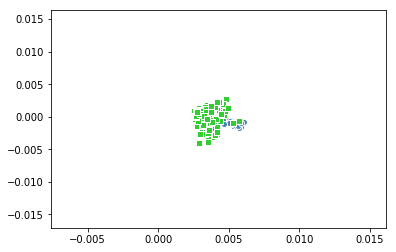

In [40]:
plt.scatter(y_train_pred,  y_train_pred - train_y,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - test_y,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

In [ ]:
#next steps
#1 bring in geo as planned using backward encoding or 
#2 let's take nlog of target and analyze the new differences
#3 discretize budget

In [ ]:
#plt.plot(np.log(allDataDuped['CPV']).values)

In [ ]:
#np.log(allDataDuped['CPV']).values.min()

In [ ]:
#allDataDuped['CPV'][:3].values.min()

In [ ]:
#plt.plot(allDataDuped['CPV'].values)

In [41]:
#after working on geo Ive found that geo will require more slicing and replacing at dma/state level...so if
#dma is not there then state, etc...makes it harder.

In [ ]:
#Otherwise this is done and we should push into production